In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
Triathlon= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Triathlon")
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
Athletes=pd.read_excel("V02Max_Combined.xlsx",sheet_name="Athletes")
AllAthletesData=pd.merge(Kayaking,Triathlon,how='outer').merge(Fencing,how='outer')
AllAthletesData.head()
AllAthletesData.to_excel('AllAthletesData.xlsx',sheet_name='AllAthletesData',index=False)
df_excersizetype=pd.read_excel('AllAthletesData.xlsx',sheet_name='AllAthletesData')
df_excersizetype.loc[df_excersizetype['time'] < 0,'ExType']='Warm Up' 
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] > 0), 'ExType'] = 'GET'
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] == 0), 'ExType'] = 'Cool Down'
df_excersizetype



C:\Users\shoeg\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\shoeg\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\shoeg\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,ID,time,RR,VO2,power,ExType
0,1,-130.840,672.0,0.302008,0,Warm Up
1,1,-130.168,672.0,0.302008,0,Warm Up
2,1,-129.536,632.0,0.301336,0,Warm Up
3,1,-128.824,712.0,0.301336,0,Warm Up
4,1,-127.948,876.0,0.301336,0,Warm Up
...,...,...,...,...,...,...
52057,18,947.288,536.0,0.507071,0,Cool Down
52058,18,947.816,528.0,0.507071,0,Cool Down
52059,18,948.344,528.0,0.507071,0,Cool Down
52060,18,948.884,540.0,0.507071,0,Cool Down


Q33: Create a list and a tuple. Print the types and lengths of  both.

In [4]:

# Getting athletes ID and full name from the VO2Max_Combined as lists and tuples 
Athletes_list = Athletes['ID'].tolist()
Athletes_tuple = tuple(Athletes['First Name'] + " " + Athletes['Last Name'])

# Printing out the values, types and lengths of both of the list and tuples
print("\nAthletes List:\t", Athletes_list)
print("\nType :\t", type(Athletes_list))
print("\nLength :\t", len(Athletes_list))

print("\nAthletes tuple:\t",Athletes_tuple)
print("\nType :\t", type(Athletes_tuple))
print("\nLength :\t", len(Athletes_tuple))


Athletes List:	 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

Type :	 <class 'list'>

Length :	 18

Athletes tuple:	 ('Olivia Martinez', 'Ethan Reynolds', 'Jackson Harper', 'Liam Sanchez', 'Ava Thompson', 'Sophia Rodriguez', 'Grace Simmons', 'Aiden Bennett', 'Chloe Price', 'Lily Jordan', 'Isabella Griffin', 'Caleb Dixon', 'Mia Carpenter', 'Harper Mitchell', 'Mason Wallace', 'Logan Anderson', 'Lucas Foster', 'Owen Myers')

Type :	 <class 'tuple'>

Length :	 18


Q34: Display a word cloud using any values in the dataset

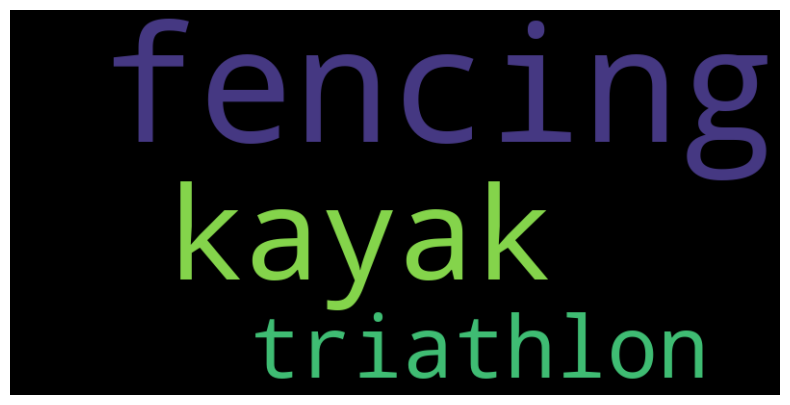

In [13]:
#!pip install wordcloud
# getting the sport being played by the most of the athletes
data_Combined = ' '.join(Athletes['sport'])

#passing arguments and attributes and plotting a chart
word_Cloud = WordCloud(width=800, height=400, background_color='black').generate(data_Combined)
plt.figure(figsize=(10, 5))
plt.imshow(word_Cloud, interpolation='bilinear')
plt.axis('off')  
plt.show()


Q35: Create a Regression Plot on Max V02 and mean BMI for any sport of your choice

   ID        VO2  Weight        BMI
0   1  42.807730    53.7  20.716793
1   2  38.632602    56.2  21.414419
2   3  69.705657    89.9  24.642965
3   4  76.989878    76.5  23.611111
4   5  86.742579    76.4  22.083478
5   6  71.679465    65.6  22.968383
6   7  38.403988    49.8  18.292011
7   8  44.822092    51.2  18.806244
8   9  49.697342    57.1  18.433626
9  10  55.122171    58.8  18.768553


C:\Users\shoeg\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


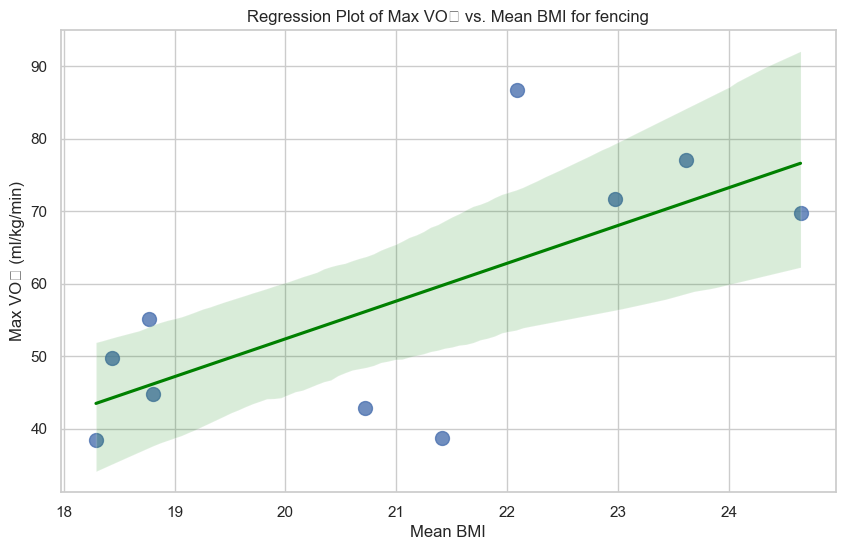

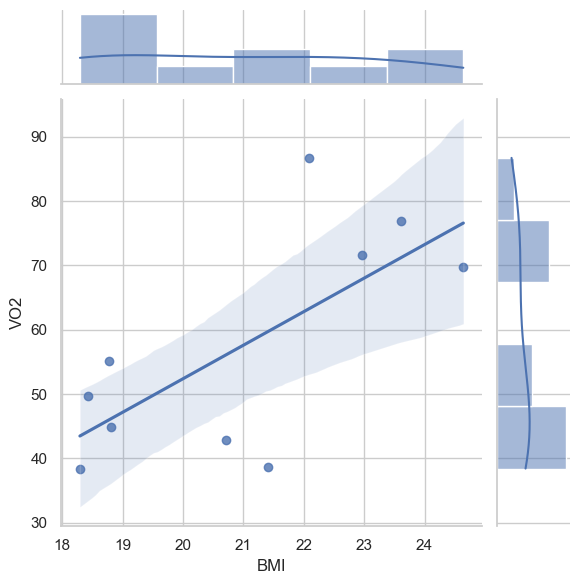

In [15]:
# BMI is calculated with weight/heightinmeters**2
Athletes['BMI']=Athletes['Weight']/(Athletes['Height']/100)**2

# fencing sport data is retrieved from dataset
fencing_Athletes = Athletes[Athletes['sport'] == 'fencing']
athlete_Data = fencing_Athletes[['ID','Weight', 'BMI']]

max_VO2_Data=AllAthletesData[['ID','VO2']].groupby(by='ID').sum().reset_index()
max_VO2_Data=max_VO2_Data.merge(athlete_Data,on='ID')
max_VO2_Data['VO2'] /= max_VO2_Data['Weight']

print(max_VO2_Data)

sns.set(style="whitegrid")

#passing arguments and attributes for regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='BMI', y='VO2', data=max_VO2_Data, scatter_kws={'s':100}, line_kws={'color':'green'})

#---------Solution 1
# Adding labels and title
plt.xlabel('Mean BMI')
plt.ylabel('Max VO₂ (ml/kg/min)')
plt.title('Regression Plot of Max VO₂ vs. Mean BMI for fencing')
plt.show()

#---------Solution 2
#Showing jointplot for the comparison
sns.jointplot(x="BMI", y="VO2", data=max_VO2_Data, kind="reg");

Q36: Plot the time series of HR( every 5 mins) of athlete 1

C:\Users\shoeg\AppData\Local\Temp\ipykernel_21924\16235004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_data['HeartRate'] = 60 * 1000 / time_data['RR']
C:\Users\shoeg\AppData\Local\Temp\ipykernel_21924\16235004.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_data['time'] = pd.to_datetime(time_data['time'])


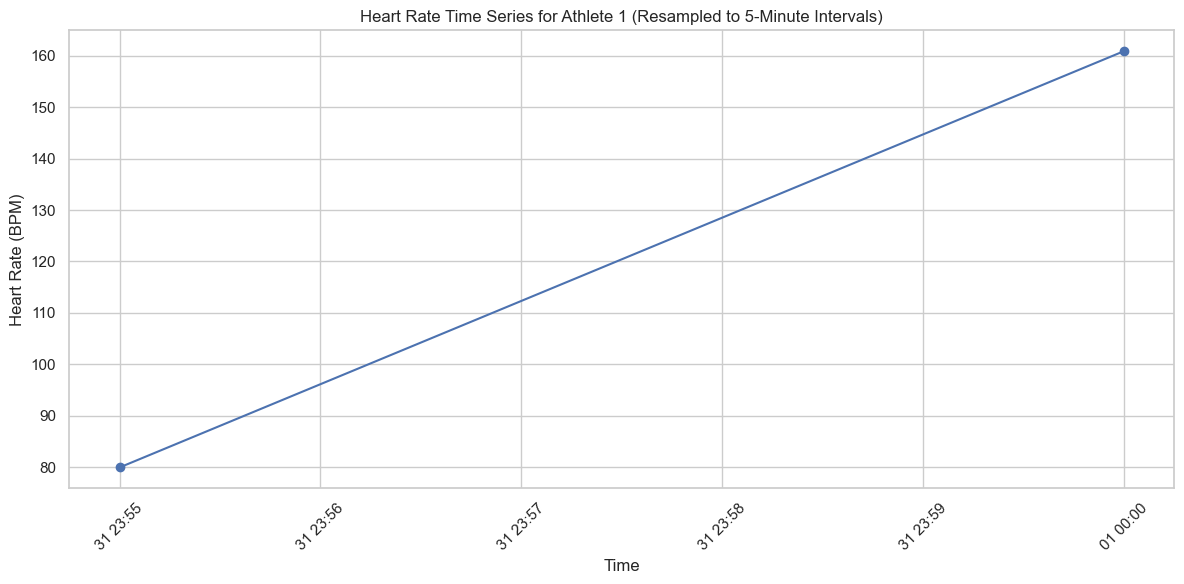

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
time_data= AllAthletesData[AllAthletesData['ID'] == 1]

#time_data['time'] = pd.to_datetime(time_data['time'])
time_data['HeartRate'] = 60 * 1000 / time_data['RR']
time_data['time'] = pd.to_datetime(time_data['time'])

# Set 'Time' column as index
time_data.set_index('time', inplace=True)

# Resample to 5-minute intervals and interpolate missing values
df_resampled = time_data.resample('5T').mean().interpolate()

plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['HeartRate'], marker='o', linestyle='-', color='b')
plt.title('Heart Rate Time Series for Athlete 1 (Resampled to 5-Minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Heart Rate (BPM)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q37: What was the maximum power achieved in terms of watts, which participant achieved it? Display name, sport and watts.

In [109]:
max_Power_Data = AllAthletesData[['ID','power']]
max_Power_Data = max_Power_Data.merge(Athletes,on='ID')

max_Power = max_Power_Data['power'].max()

res = max_Power_Data[max_Power_Data['power'] == max_Power].drop_duplicates(subset = ['ID'])

print(f"\nName of the participant : {res['First Name'].to_string(index=False) + " " + res['Last Name'].to_string(index=False)} ")
print(f"\nSport played by participant : {res['sport'].to_string(index=False)}  ")
print(f"\nMaximum power in watts : {res['power'].to_string(index=False)}  ")



Name of the participant : Isabella Griffin 

Sport played by participant : kayak  

Maximum power in watts : 335  


Q38: What is the average  difference in IBI during the warm up Vs the actual test?

In [113]:

avg_IBI = df_excersizetype.groupby('ExType')['RR'].mean()
#print(avg_IBI)
diff_IBI = avg_IBI['GET'] - avg_IBI['Warm Up']

print(f"\nThe average IBI difference b/w warm up and actual test is : {diff_IBI:.2f} milliseconds")



The average IBI difference b/w warm up and actual test is : -357.62 milliseconds


Q39: 
Print out what's in indexes 7, 10, and 3 for the array. [1, 2, 3, 4, 5,6,7,8,9,10]

In [117]:
int_array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Array index starts from 0 and ends at 9.Trying to print unaccessable index will cause index error 
try:
    print(int_array[7]) 
    print(int_array[10]) 
    print(int_array[3])  #will not get printed since error occured in previous step
except IndexError as e:
    print(f"We cannot access this index because {e}")



8
We cannot access this index because list index out of range


Q40:   [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]  Use array slicing to display elements 1,3,5. If the value is less than 4 display it as 99

In [121]:
given_arr =np.array([[1, 2, 3, 4, 5],[6, 7, 8, 9, 10],[11, 12, 13, 14, 15],[16, 17, 18, 19, 20],[21, 22, 23, 24, 25],[26, 27, 28, 29, 30]])
print("\nOriginal array:\n")
print(given_arr)   

sliced_arr = given_arr[0:1:,0:5:2]
print(f"\nSliced array:\t {sliced_arr}")

#If the value is less than 4 display it as 99
sliced_arr[sliced_arr < 4]=99
print(f"\nFinal output:\t {sliced_arr}")



Original array:

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]

Sliced array:	 [[1 3 5]]

Final output:	 [[99 99  5]]


Q41: What was lowest wattage achieved at the end of a test and by which participant? Display name, sport and watts.

In [221]:

low_Power_Data = df_excersizetype[['ID','ExType','power']]
low_Power_Data = low_Power_Data[low_Power_Data['ExType'] == 'GET'].groupby(by='ID').min().reset_index()
low_Power_Data = low_Power_Data.merge(Athletes,on='ID')
display(low_Power_Data[['First Name', 'Last Name', 'sport', 'power']])


,First Name,Last Name,sport,power
0,Olivia,Martinez,fencing,50
1,Ethan,Reynolds,fencing,50
2,Jackson,Harper,fencing,50
3,Liam,Sanchez,fencing,50
4,Ava,Thompson,fencing,50
5,Sophia,Rodriguez,fencing,50
6,Grace,Simmons,fencing,50
7,Aiden,Bennett,fencing,50
8,Chloe,Price,fencing,50
9,Lily,Jordan,fencing,50


Q42: What was the difference in heart rate between warm up and GET for athlete 1

In [127]:
# calculating HR
df_excersizetype['HeartRate'] = 60 * 1000 / df_excersizetype['RR']

athlete_id = 1  
HR_Data = df_excersizetype[df_excersizetype['ID'] == athlete_id]

warmup = HR_Data[HR_Data['ExType'] == 'Warm Up']  
GET = HR_Data[HR_Data['ExType'] == 'GET'] 

warmup_AVG = warmup['HeartRate'].mean()
GET_AVG = GET['HeartRate'].mean()

diff_heart_rate = GET_AVG - warmup_AVG
print(f"\nThe difference in heart rate b/w warm up and GET fot athlete 1 is  {diff_heart_rate:.2f}")


The difference in heart rate b/w warm up and GET fot athlete 1 is  82.49


Q43: Create a pivot table that shows count of patients within each age group and sport

In [137]:
# putting age range into bins for easy understanding
bins = [0, 12, 14, 16, 18, 100] 
labels = ['0-12', '13-14', '15-16', '17-18', '19+'] 

Athletes['age_range'] = pd.cut(Athletes['age'], bins=bins, labels=labels, right=True)
piv_data = pd.pivot_table(Athletes, index='age_range', columns='sport',values='ID',aggfunc='count',observed=False)

print("\nNumber of athletes in each age group and sport:\n")
print(piv_data)


Number of athletes in each age group and sport:

sport      fencing  kayak  triathlon
age_range                           
0-12             0      0          2
13-14            2      2          0
15-16            6      1          0
17-18            2      3          0
19+              0      0          0


Q44: Display a  distrubution chart of MAX V02 for all athletes

    ID        VO2  Weight
0    1  42.807730    53.7
1    2  38.632602    56.2
2    3  69.705657    89.9
3    4  76.989878    76.5
4    5  86.742579    76.4
5    6  71.679465    65.6
6    7  38.403988    49.8
7    8  44.822092    51.2
8    9  49.697342    57.1
9   10  55.122171    58.8
10  11  89.586903    84.8
11  12  92.258212    86.0
12  13  90.758693    83.9
13  14  54.869902    62.3
14  15  66.936066    63.5
15  16  69.661622    70.4
16  17  73.789806    39.9
17  18  81.208775    39.7


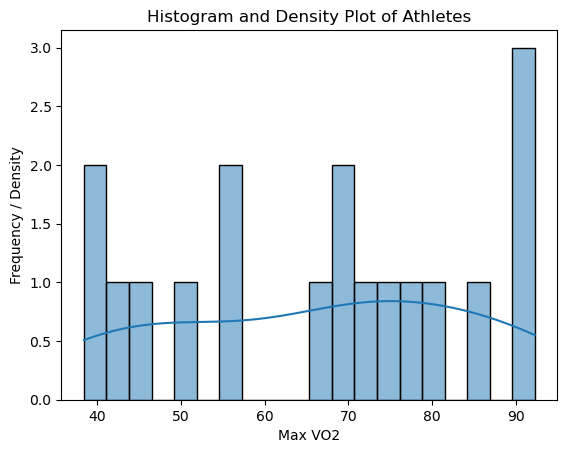

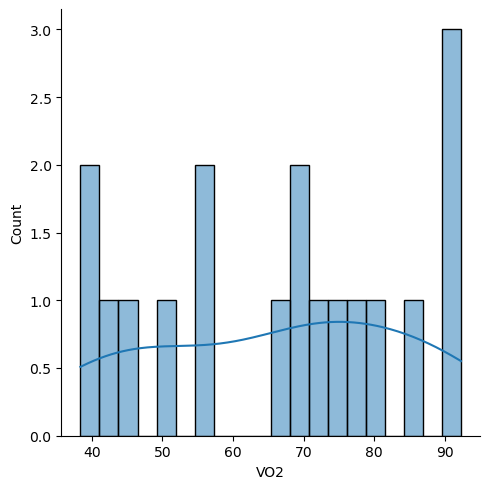

In [8]:

athlete_Data_Dist = Athletes[['ID','Weight']]

max_VO2_Data_All=AllAthletesData[['ID','VO2']].groupby(by='ID').sum().reset_index()
max_VO2_Data_All=max_VO2_Data_All.merge(athlete_Data_Dist,on='ID')
max_VO2_Data_All['VO2'] /= max_VO2_Data_All['Weight']

print(max_VO2_Data_All)

sns.histplot(max_VO2_Data_All['VO2'], kde=True, bins=20)
plt.xlabel('Max VO2')
plt.ylabel('Frequency / Density')
plt.title('Histogram and Density Plot of Athletes')
plt.show()

sns.displot(max_VO2_Data_All['VO2'],kde=True,bins=20,element='bars')
plt.show()

Q45: Create a dummy array with no data with a size of 15.

In [139]:
# Type1
# create empty object array and print
empty_obj_array1 = np.empty(15, dtype=object)
empty_obj_array2 = np.empty(15)
print(f"\nDummy Array with object type :\t {empty_obj_array1}")
print(f"\nDummy Array with any type :\t {empty_obj_array2}")

# Type2 2D Array
# create empty array 
empty_array = np.array([[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]])
# checking if its empty
print(f"\nDummy 2D Array with empty subsets :\t {empty_array}")
#print(np.any(empty_array))
print(f"\nLength of array :\t{len(empty_array)}")



Dummy Array with object type :	 [None None None None None None None None None None None None None None
 None]

Dummy Array with any type :	 [0.0e+000 0.0e+000 9.9e-324 9.9e-324 9.9e-324 0.0e+000 3.0e-323 4.9e-324
 0.0e+000 9.9e-324 1.5e-323 0.0e+000 0.0e+000 0.0e+000 0.0e+000]

Dummy 2D Array with empty subsets :	 []

Length of array :	15


Q46: How many minutes did participant 15s exercise last and what was the total V02 max consumed during the test?

In [42]:
athlete_id_min = 15  
athlete_VO2_data = df_excersizetype[df_excersizetype['ID'] == athlete_id_min] 
athlete_VO2_data = athlete_VO2_data[athlete_VO2_data['ExType'] == 'GET']
athlete_VO2_data=athlete_VO2_data.merge(athlete_Data_Dist,on='ID')

sum_time = athlete_VO2_data['VO2'].sum()
sum_VO2 = athlete_VO2_data['VO2'].sum()
weight = athlete_Data_Dist.loc[athlete_Data_Dist['ID'] == athlete_id_min, 'Weight']

x_time = sum_time/60
x_VO2 = sum_VO2/weight

print(f"\nThe 15th participant's exercise lasted for {x_time:.2f} minutes." )
print(f"\nTotal VO2 Max consumed during the test:\t {x_VO2.to_string(index=False)}ml/kg/min .")


The 15th participant's exercise lasted for 59.95 minutes.

Total VO2 Max consumed during the test:	 56.642665ml/kg/min .


Q47: Convert ' sport' into a numeric field through Label encoding

In [149]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

print("\nBefore encoding :")
#print(Athletes[['ID','First Name','Last Name','sport']])
print(Athletes['sport'].unique())
Athletes['sport_encoded'] = LabelEncoder().fit_transform(Athletes['sport'])
print("\nAfter encoding :")
print(Athletes['sport_encoded'].unique())
print(Athletes[['ID','First Name','Last Name','sport','sport_encoded']])



Before encoding :
['fencing' 'kayak' 'triathlon']

After encoding :
[0 1 2]
    ID First Name  Last Name      sport  sport_encoded
0    1     Olivia   Martinez    fencing              0
1    2      Ethan   Reynolds    fencing              0
2    3    Jackson     Harper    fencing              0
3    4       Liam    Sanchez    fencing              0
4    5        Ava   Thompson    fencing              0
5    6     Sophia  Rodriguez    fencing              0
6    7      Grace    Simmons    fencing              0
7    8      Aiden    Bennett    fencing              0
8    9      Chloe      Price    fencing              0
9   10       Lily     Jordan    fencing              0
10  11   Isabella    Griffin      kayak              1
11  12      Caleb      Dixon      kayak              1
12  13        Mia  Carpenter      kayak              1
13  14     Harper   Mitchell      kayak              1
14  15      Mason    Wallace      kayak              1
15  16      Logan   Anderson      kayak    

Q48: What was the average age of the athletes?


In [147]:
average_Age =Athletes['age'].mean()
#print(round(average_Age,2))
print(f"\nAverage age of the Athletes: {average_Age:.2f}")


Average age of the Athletes: 15.22
